<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/judiciary/CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Data Loading

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [19]:
df.isna().sum()

,0
Total Household Income,0
Region,0
Total Food Expenditure,0
Main Source of Income,0
Agricultural Household indicator,0
Bread and Cereals Expenditure,0
Total Rice Expenditure,0
Meat Expenditure,0
Total Fish and marine products Expenditure,0
Fruit Expenditure,0


In [20]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [21]:
df['Region'].value_counts()

,count
Region,
IVA - CALABARZON,4162
NCR,4130
III - Central Luzon,3237
VI - Western Visayas,2851
VII - Central Visayas,2541
V - Bicol Region,2472
XI - Davao Region,2446
I - Ilocos Region,2348
VIII - Eastern Visayas,2337


In [22]:
# Extract Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

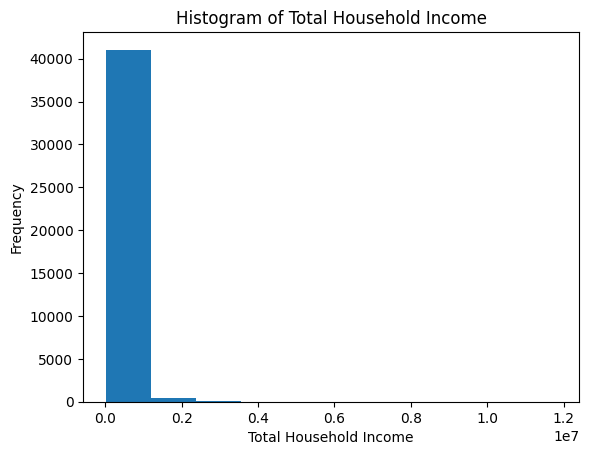

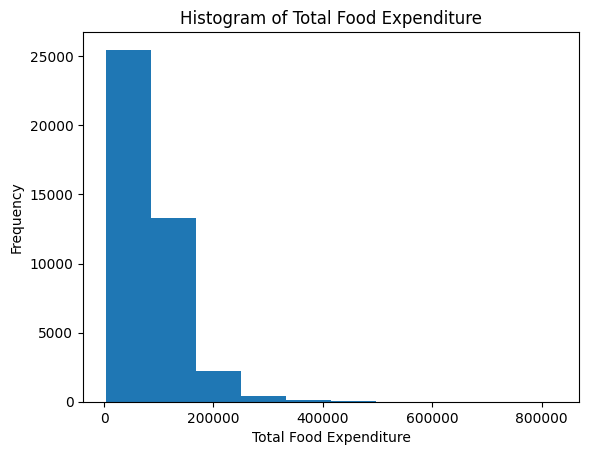

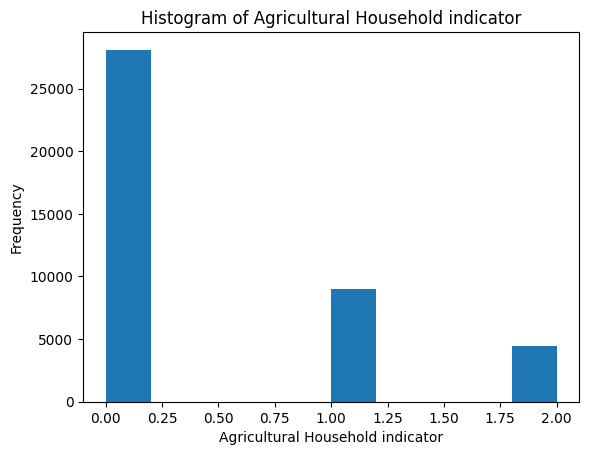

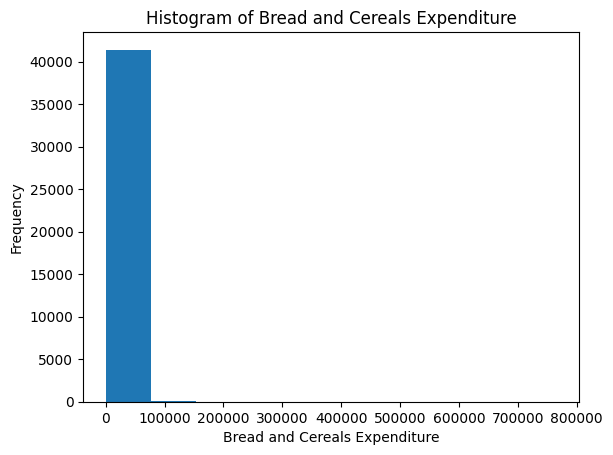

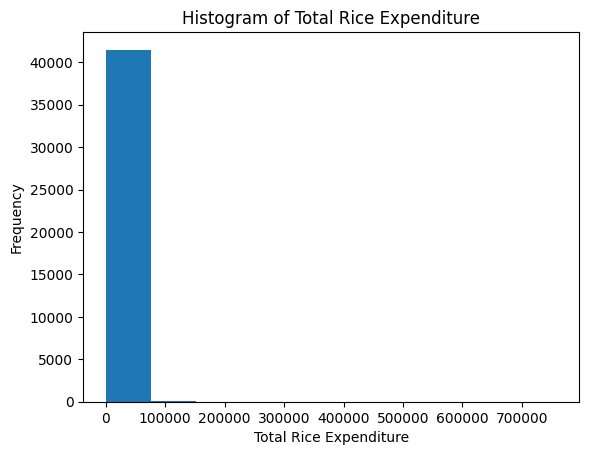

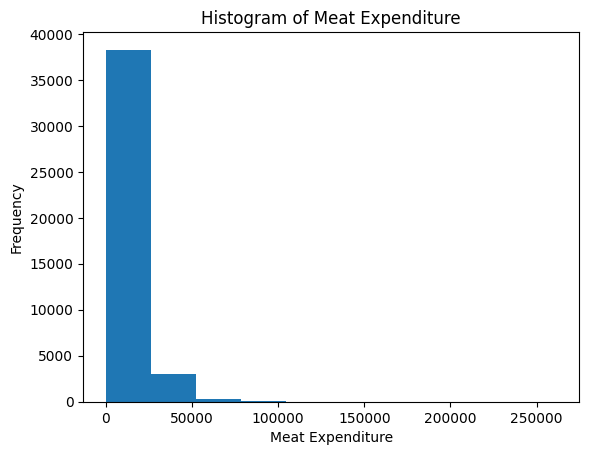

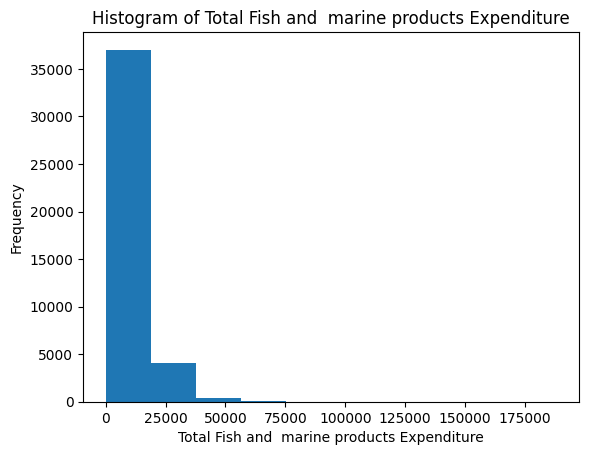

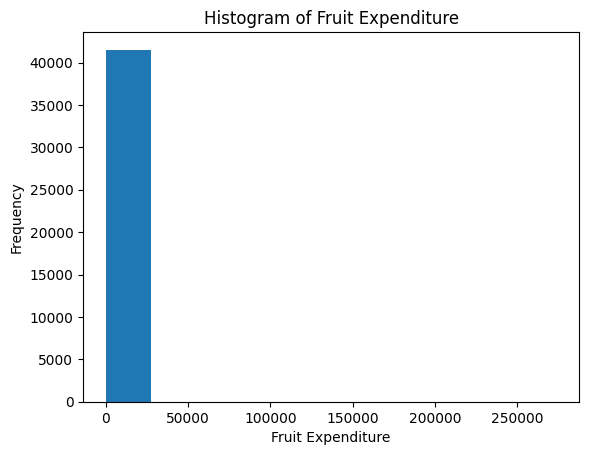

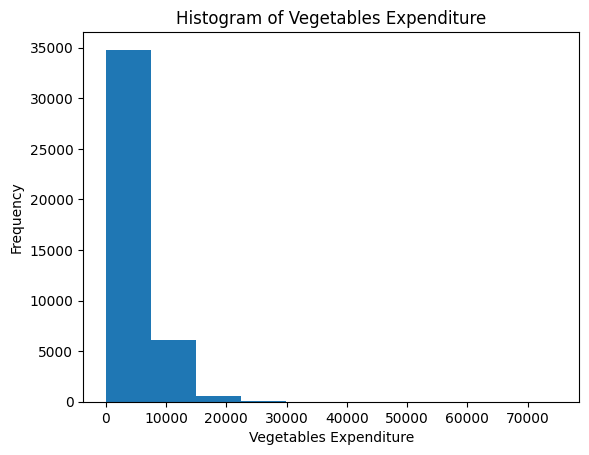

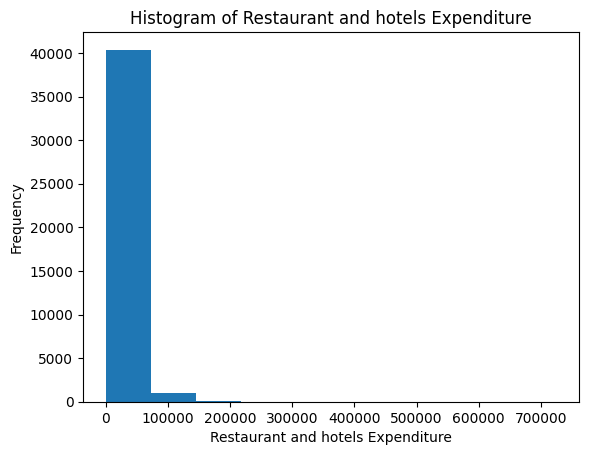

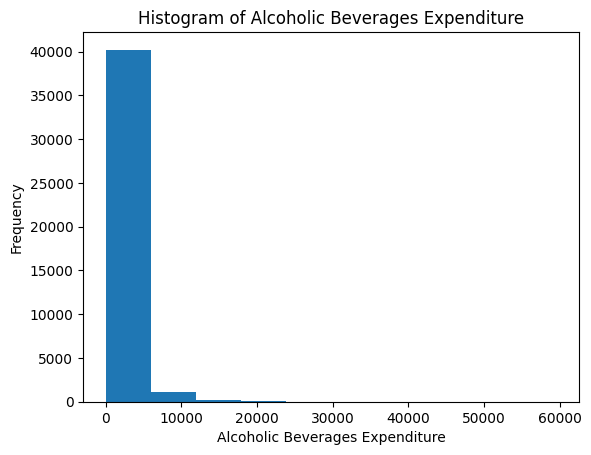

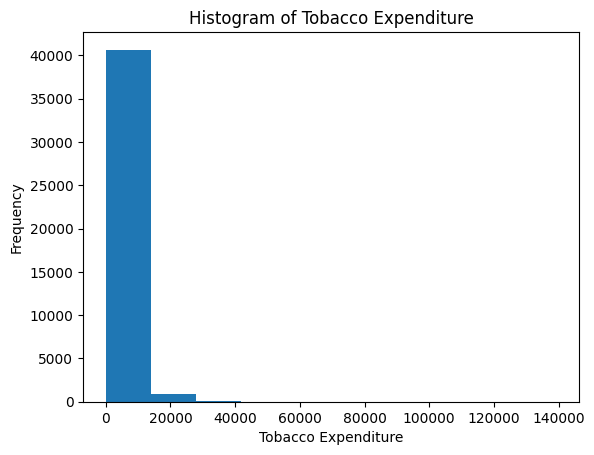

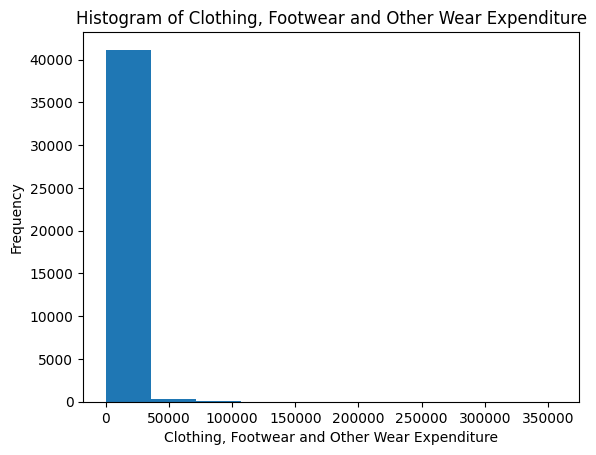

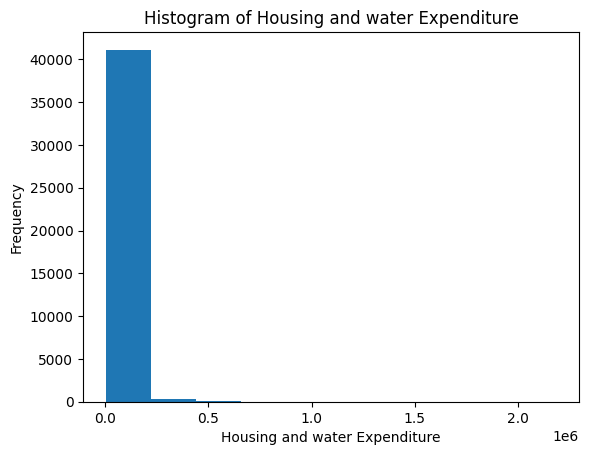

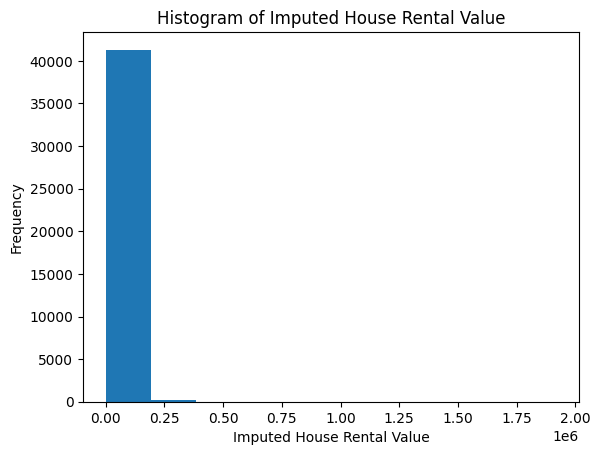

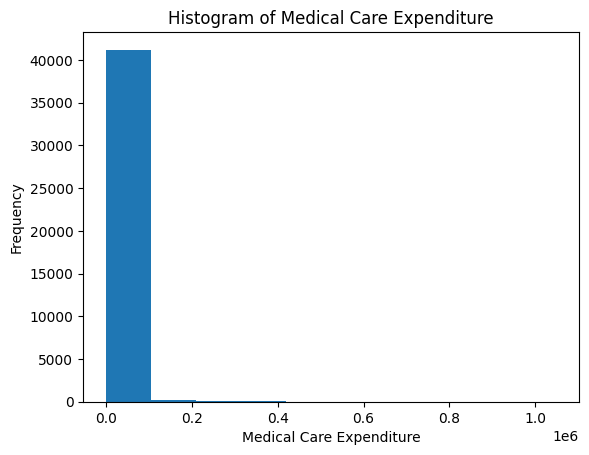

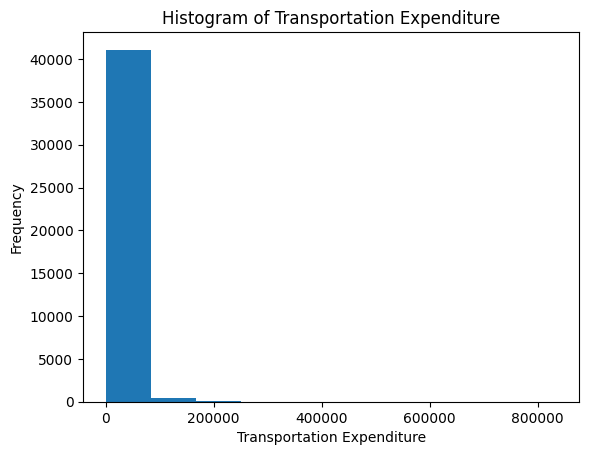

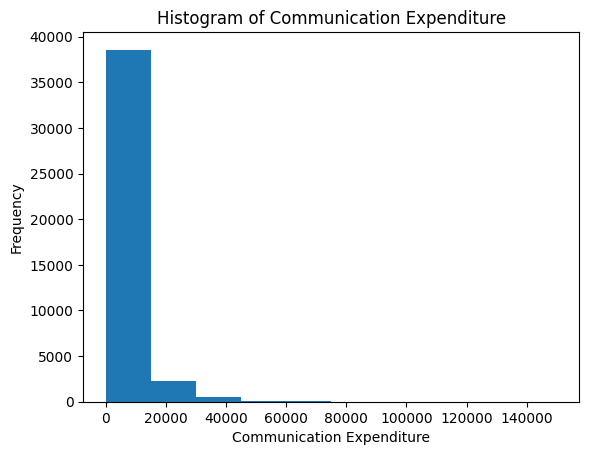

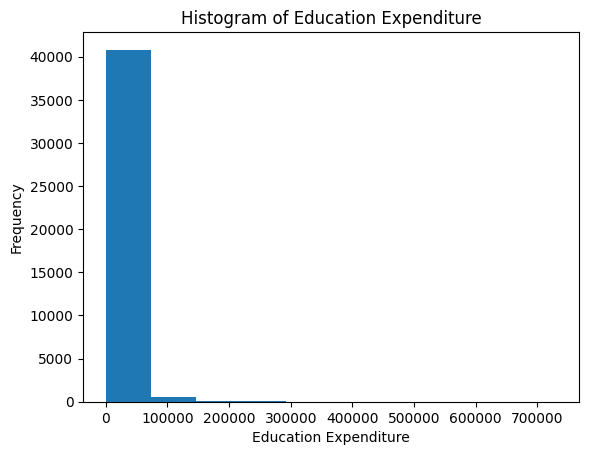

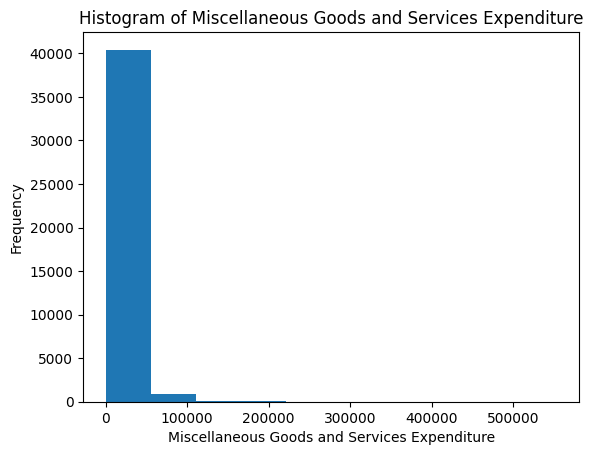

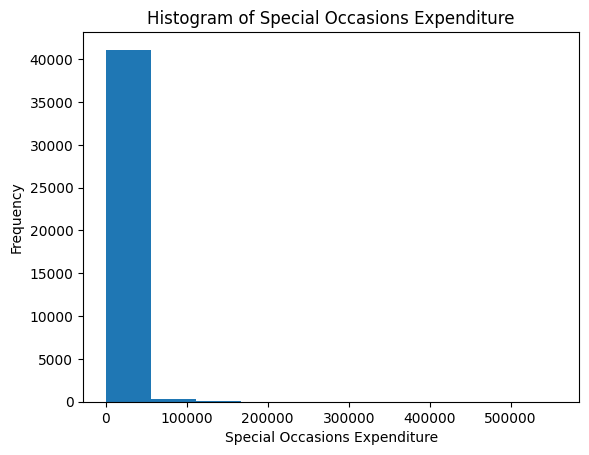

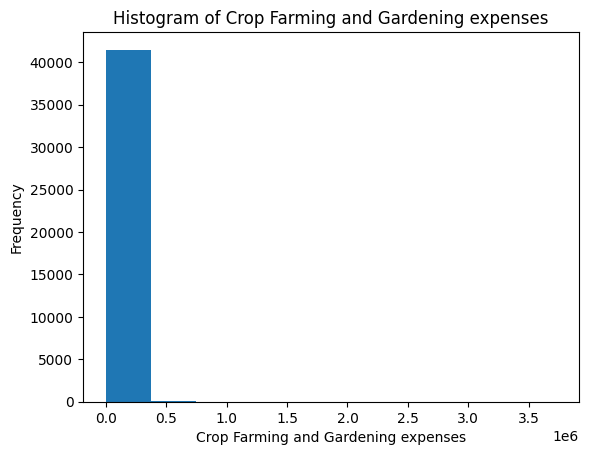

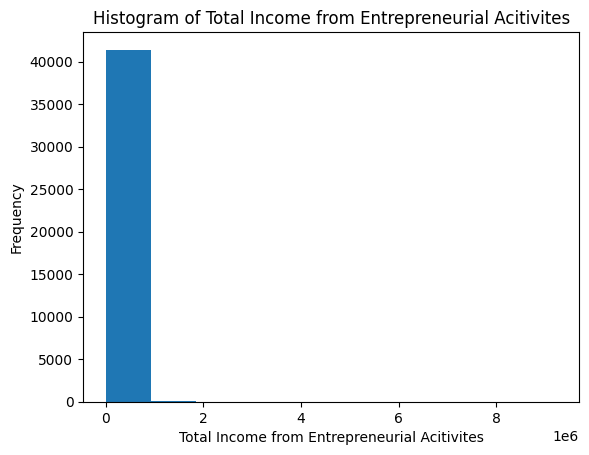

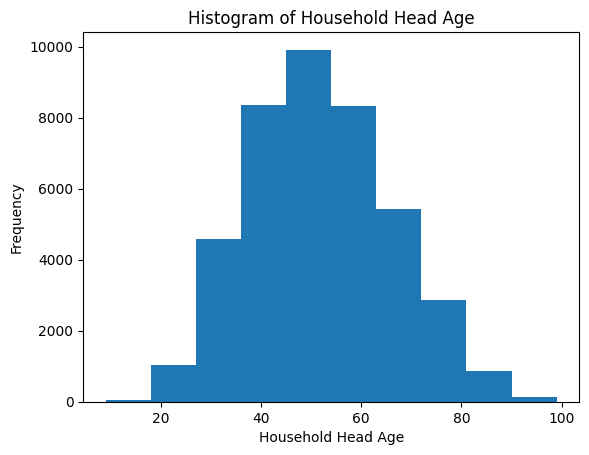

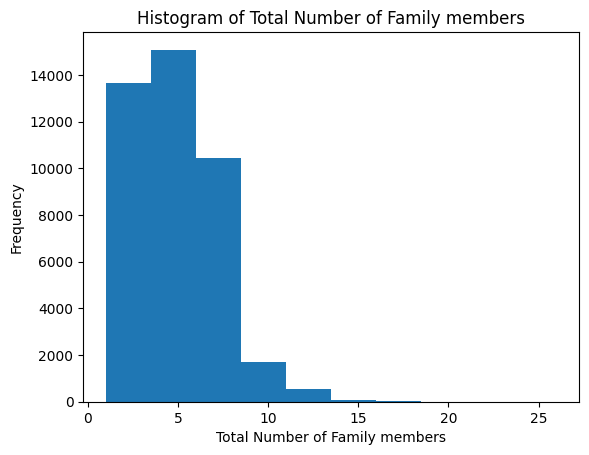

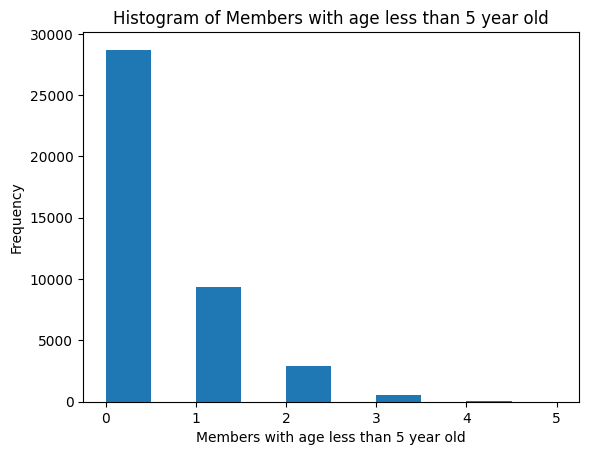

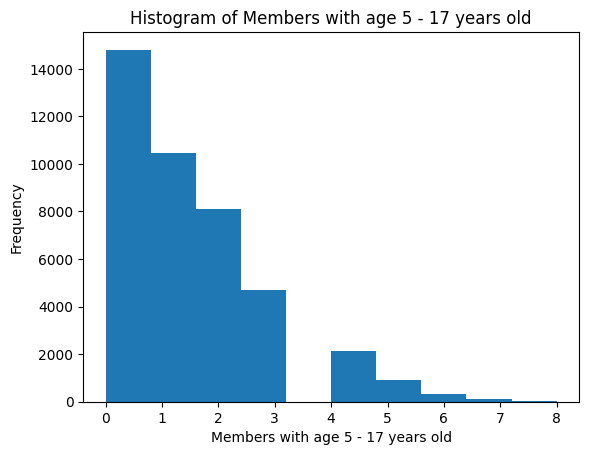

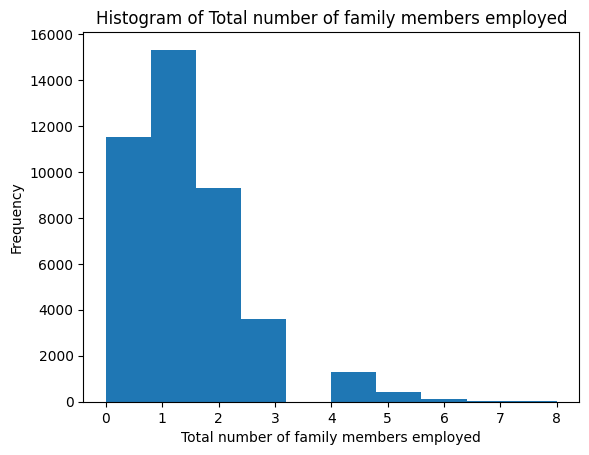

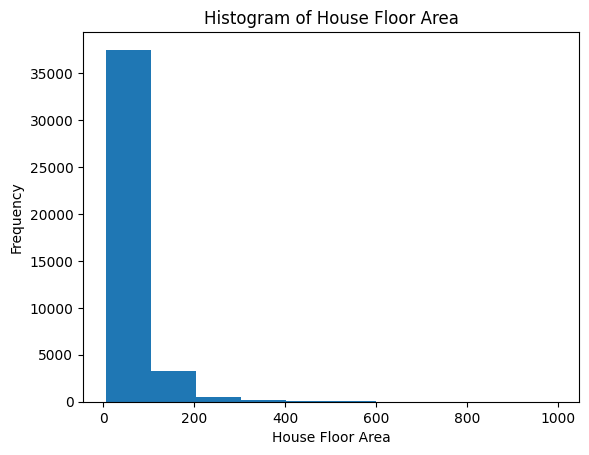

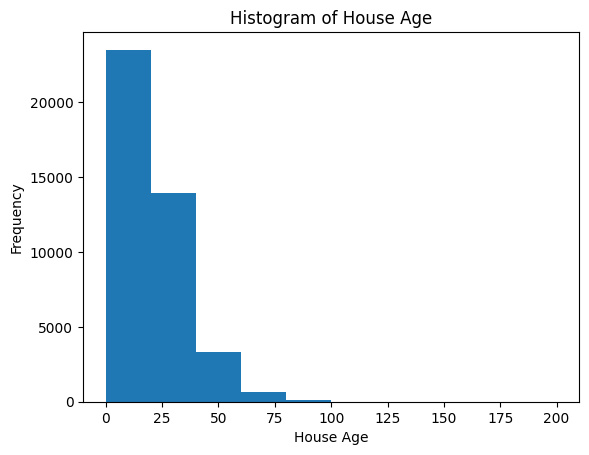

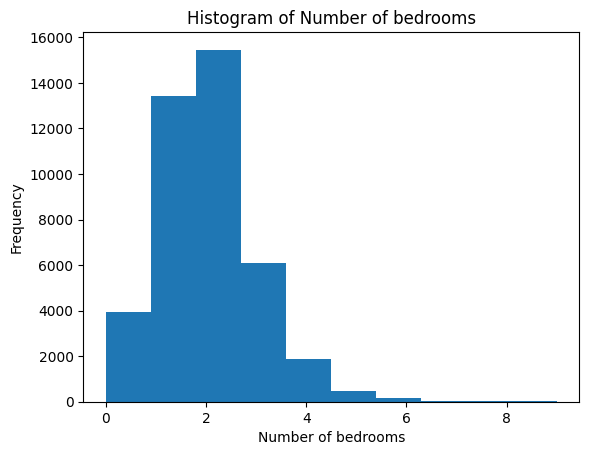

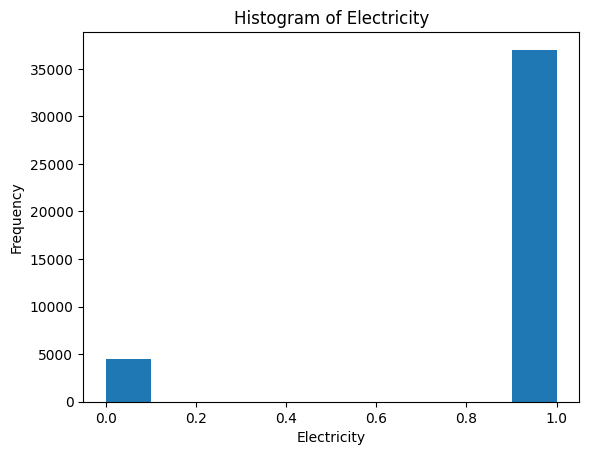

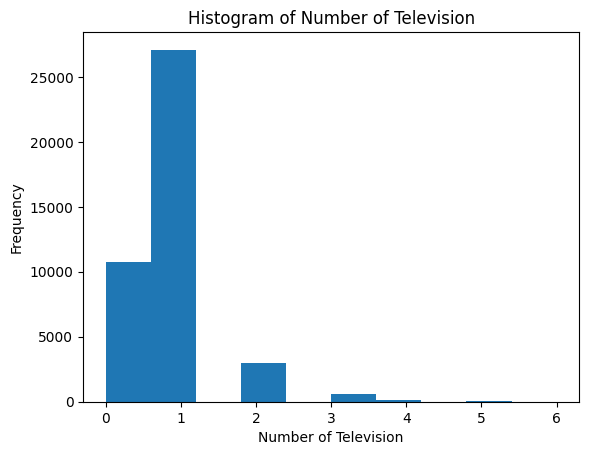

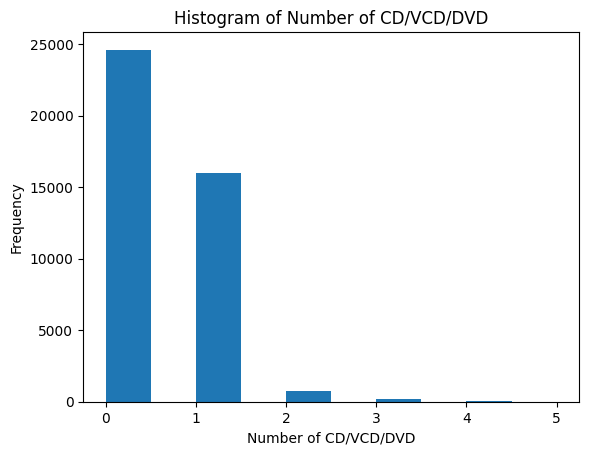

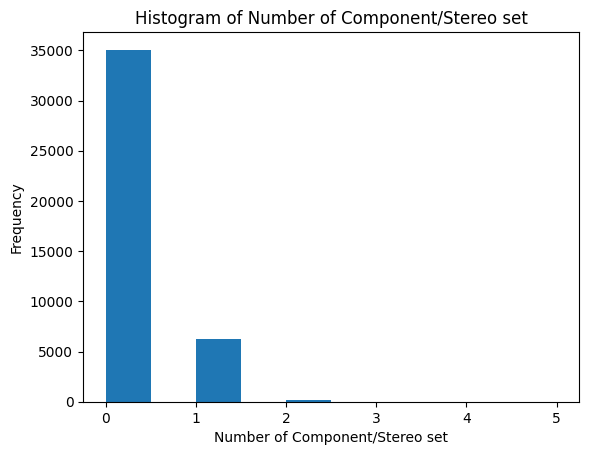

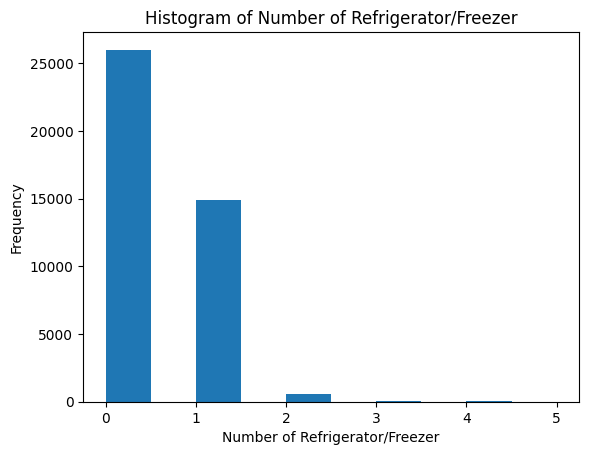

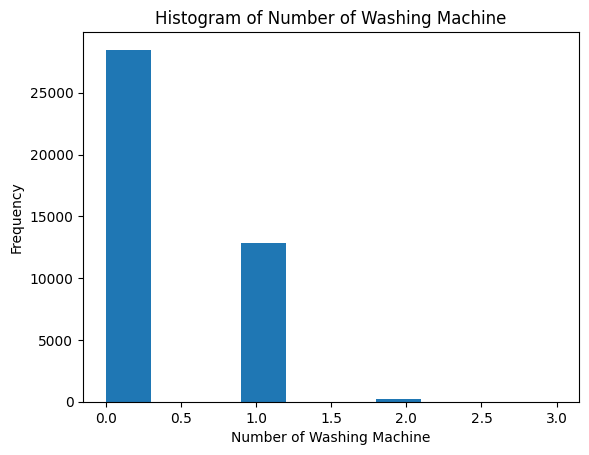

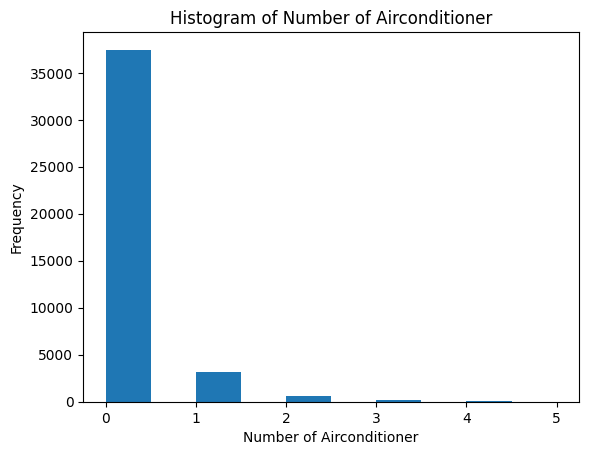

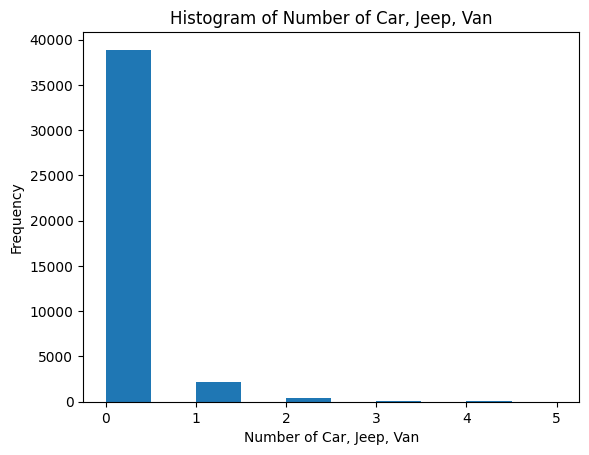

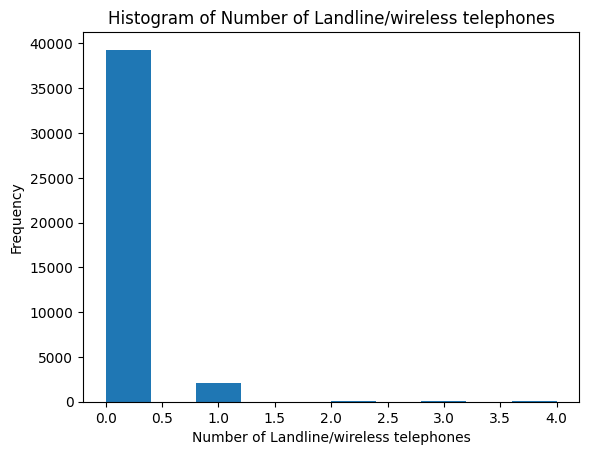

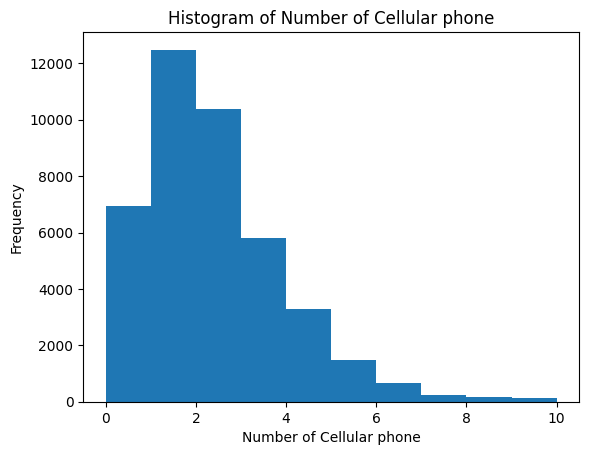

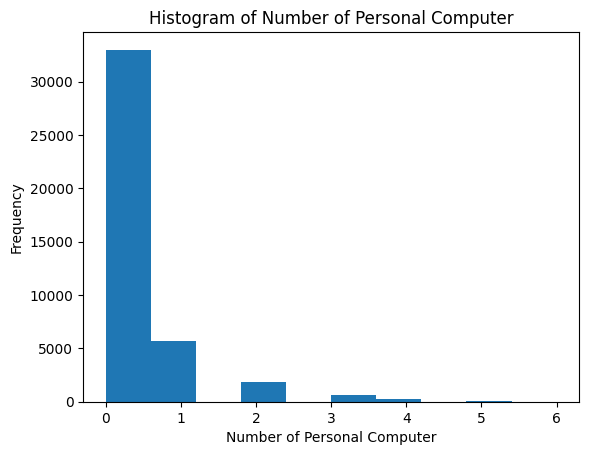

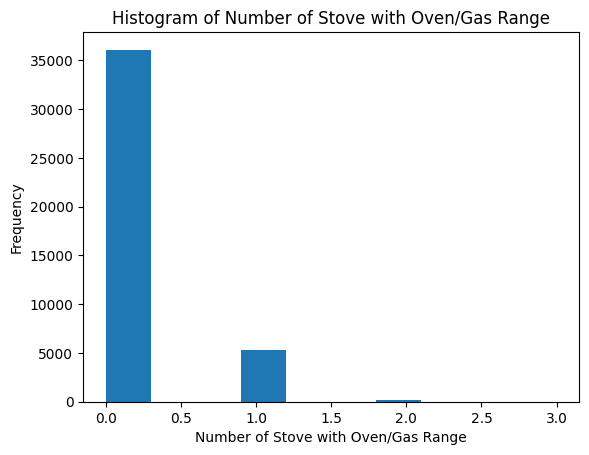

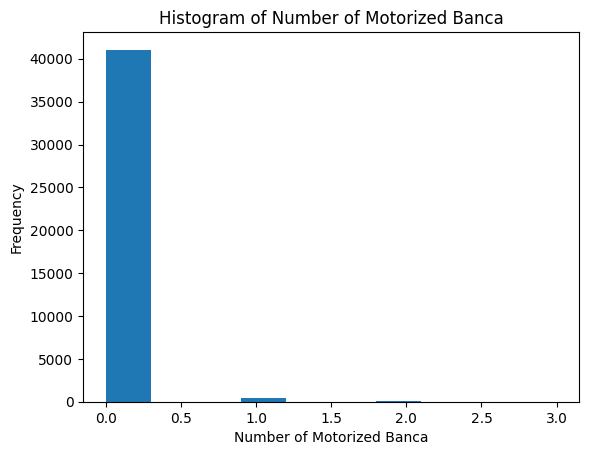

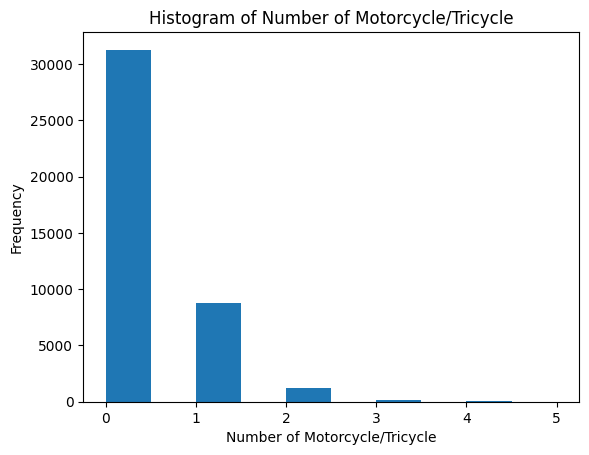

In [23]:
# Histogram for all Numerical Columns, individually
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [24]:
# Average Total Household Income per Region
average_income_per_region = df.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False)
average_income_per_region

,Total Household Income
Region,
NCR,420861.861501
IVA - CALABARZON,303360.536040
III - Central Luzon,292965.181650
CAR,269540.484638
XI - Davao Region,238115.891251
I - Ilocos Region,238110.084327
II - Cagayan Valley,236778.221721
VII - Central Visayas,234909.314050
VI - Western Visayas,220481.260260


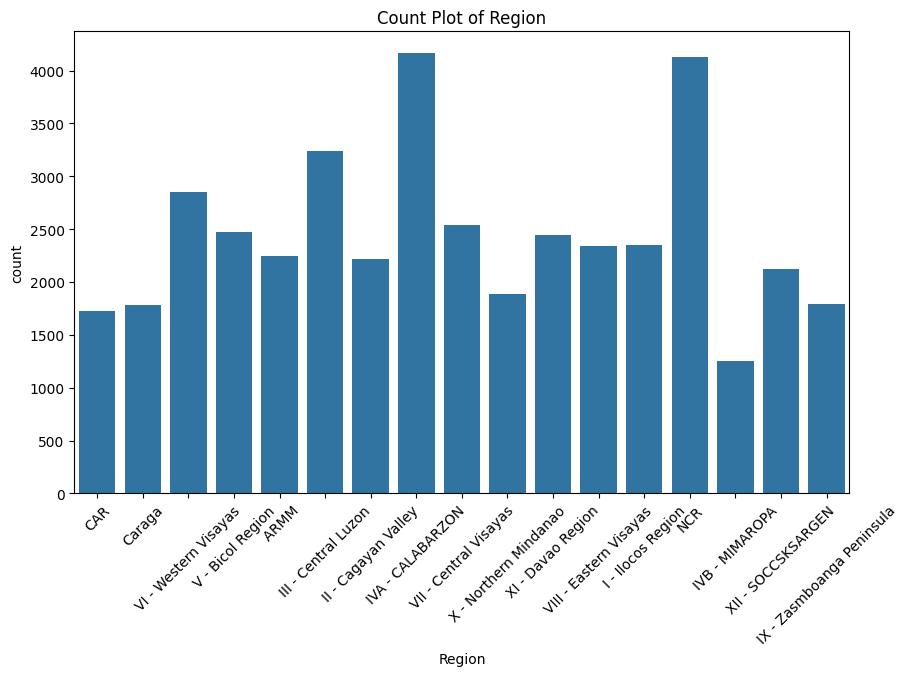

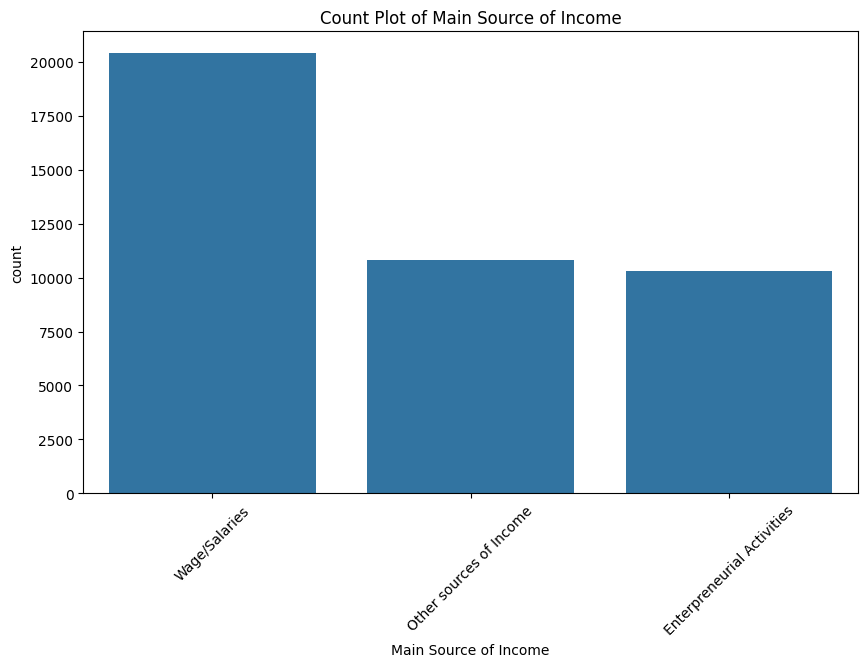

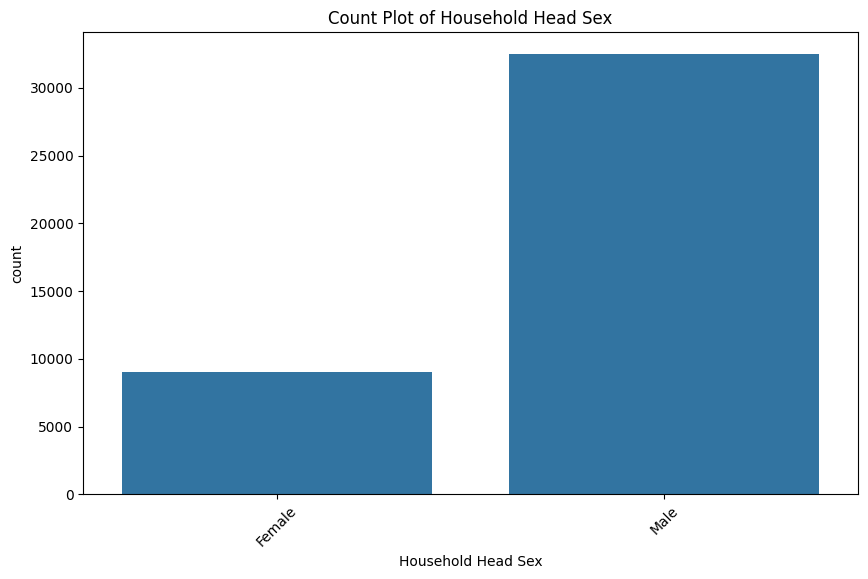

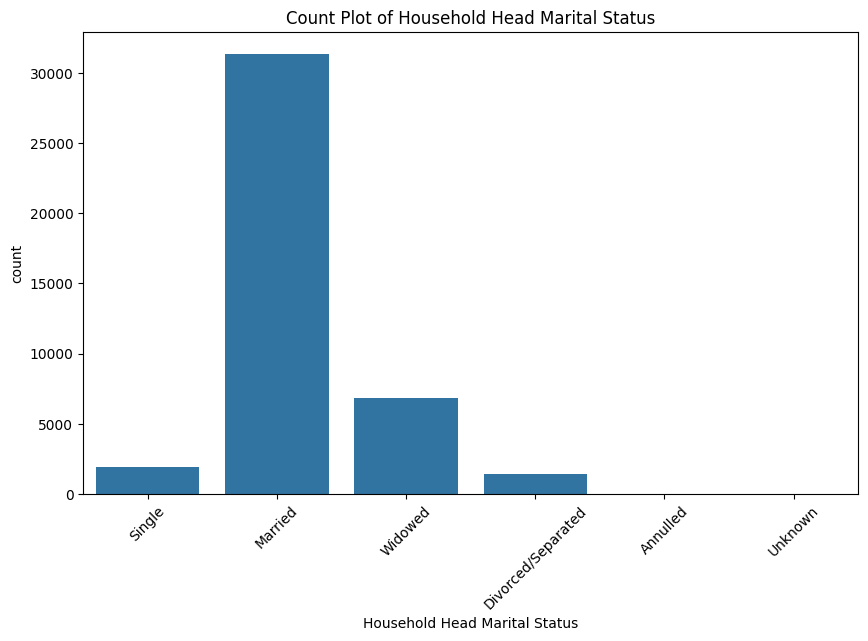

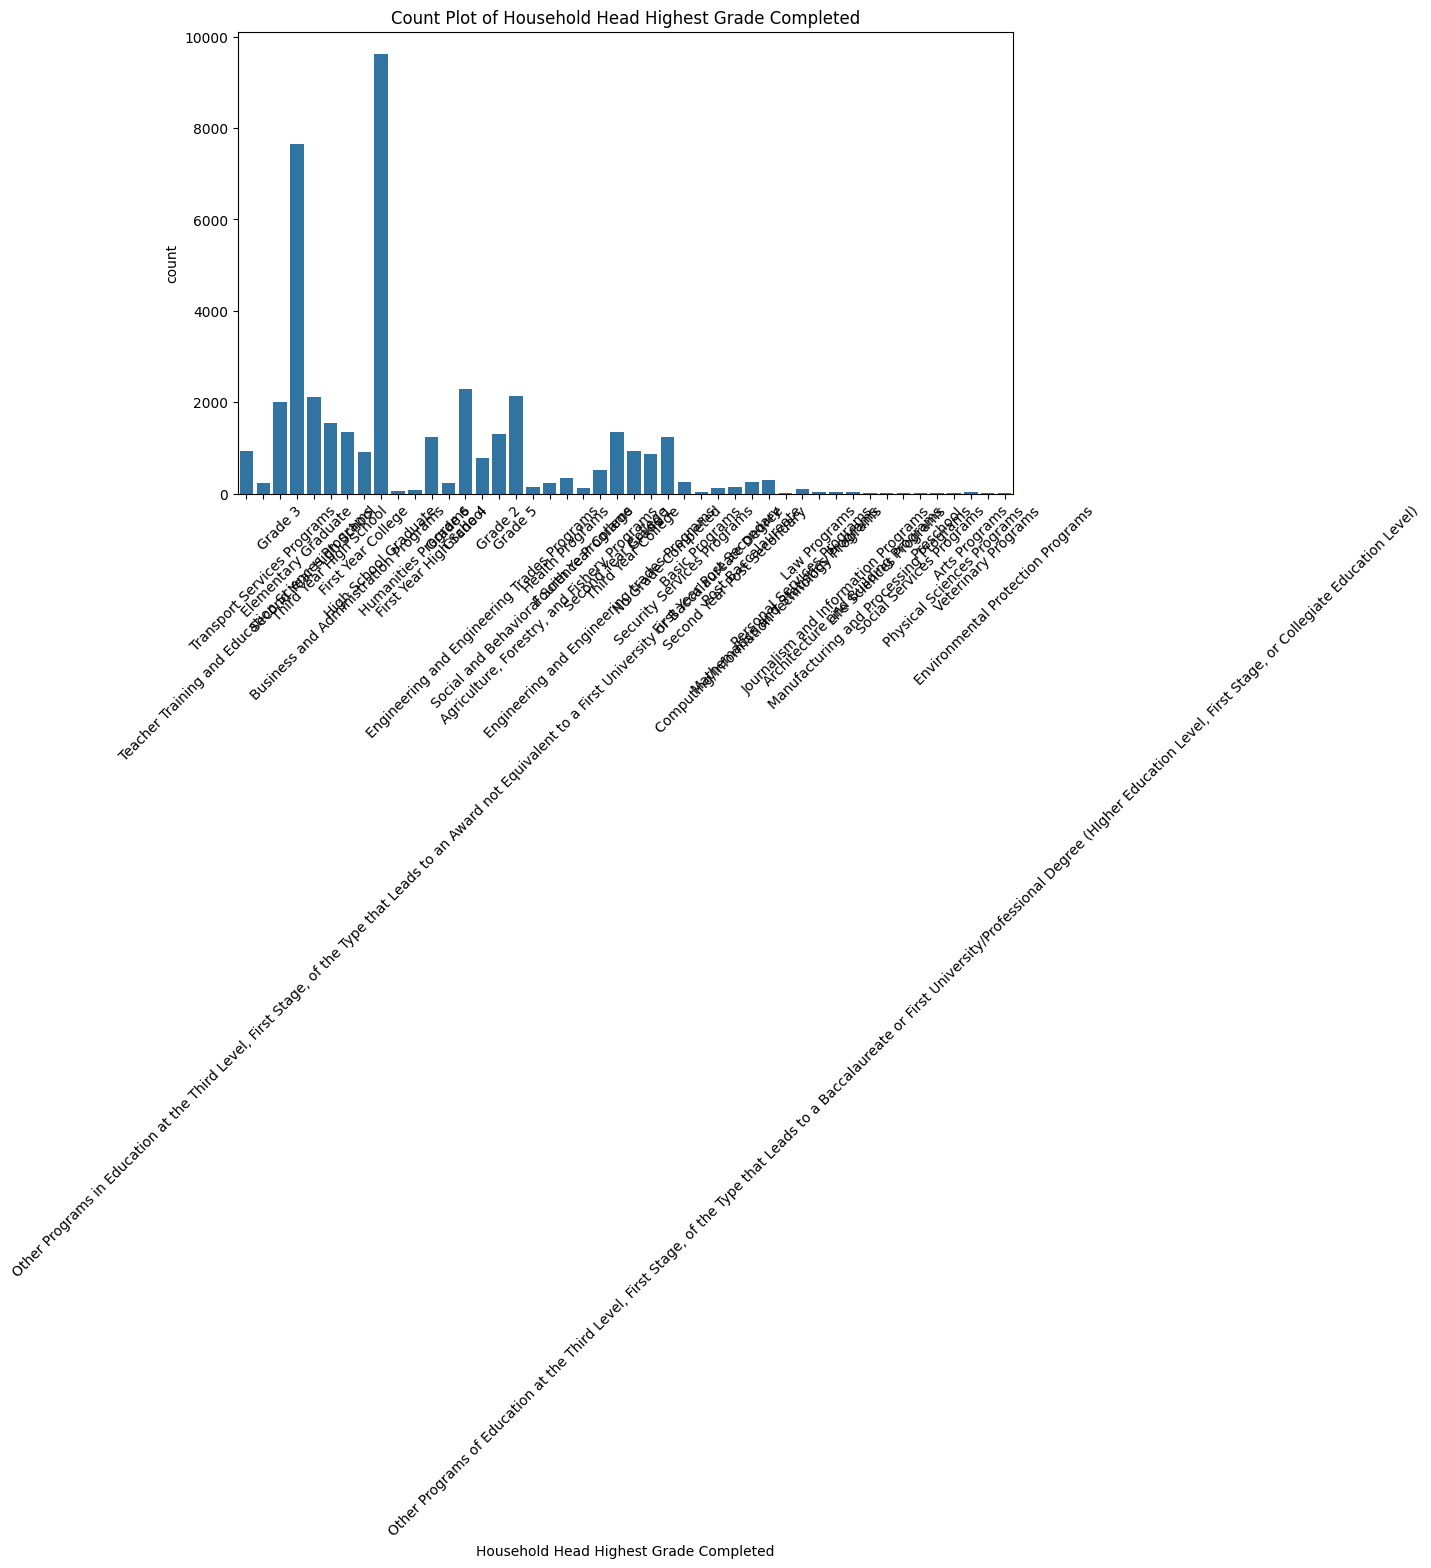

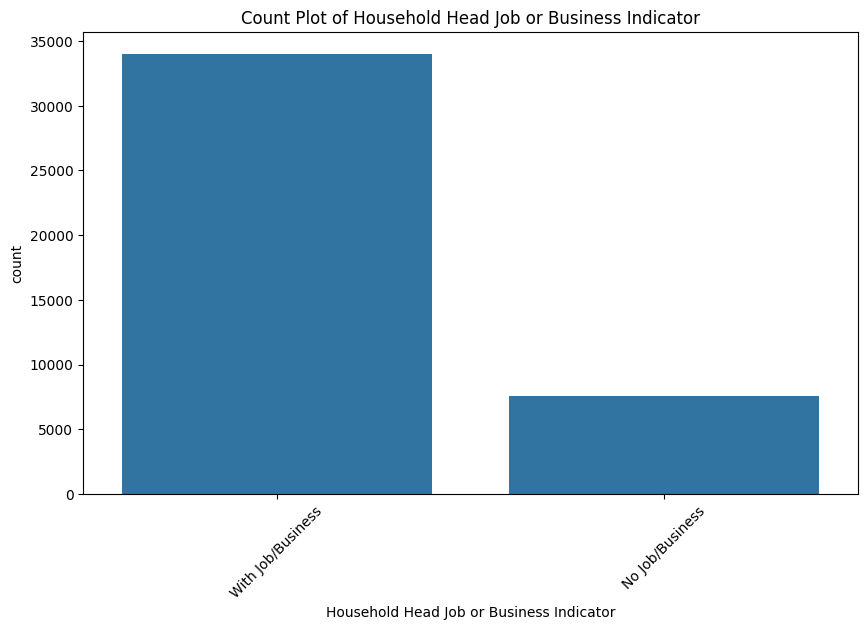

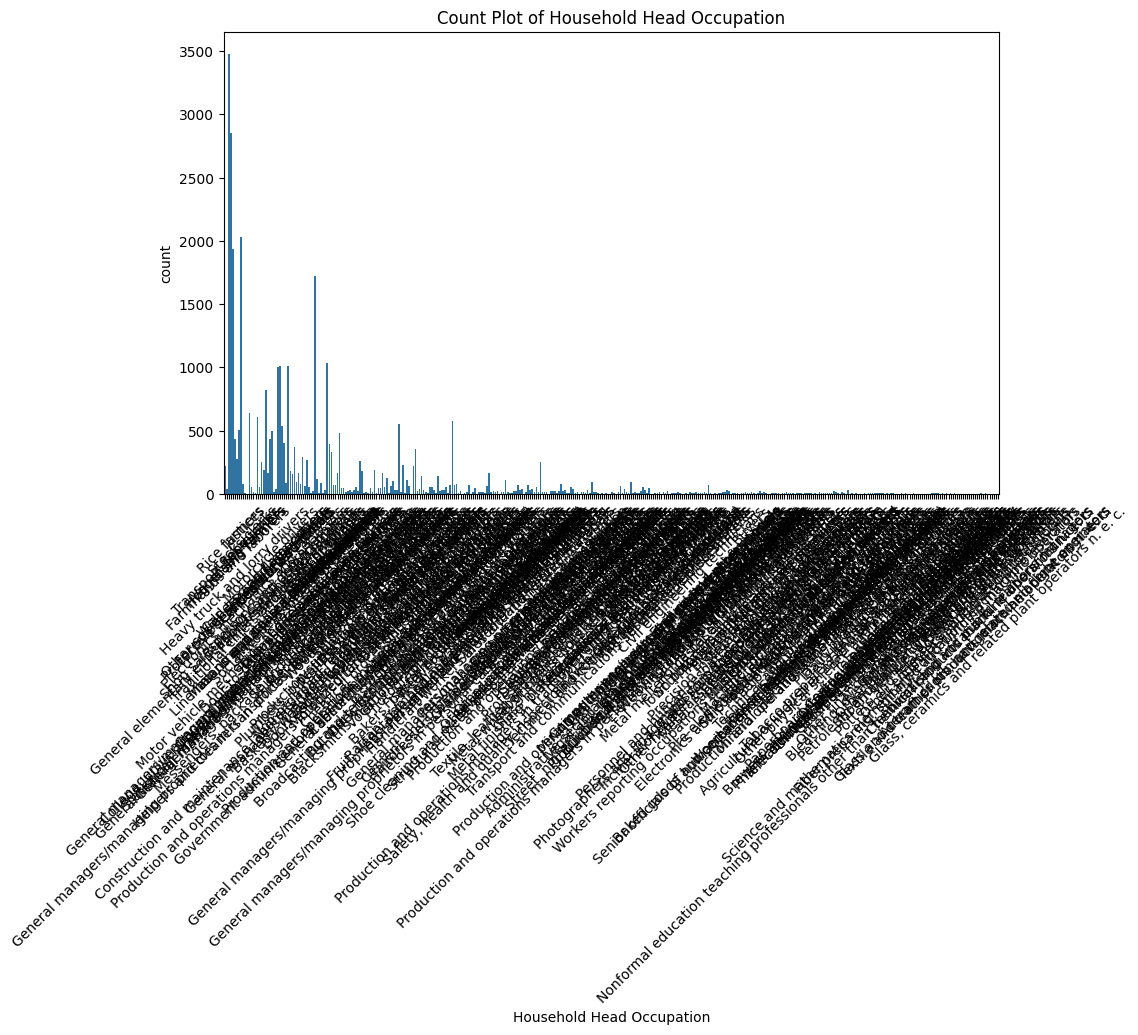

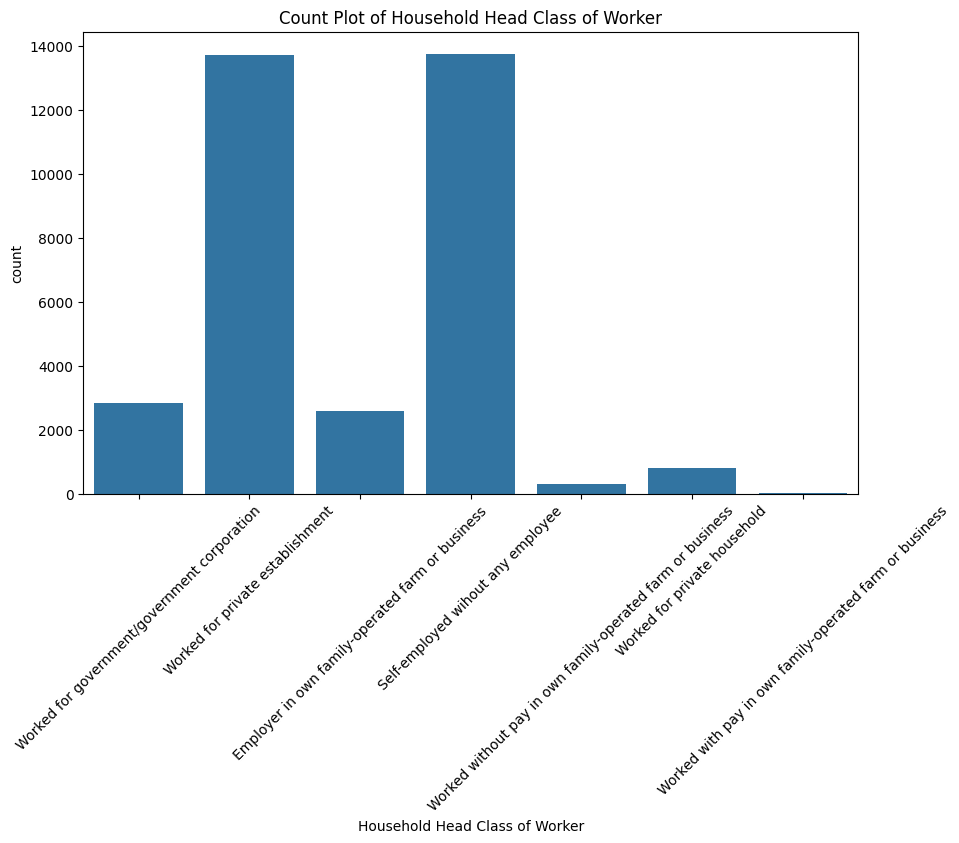

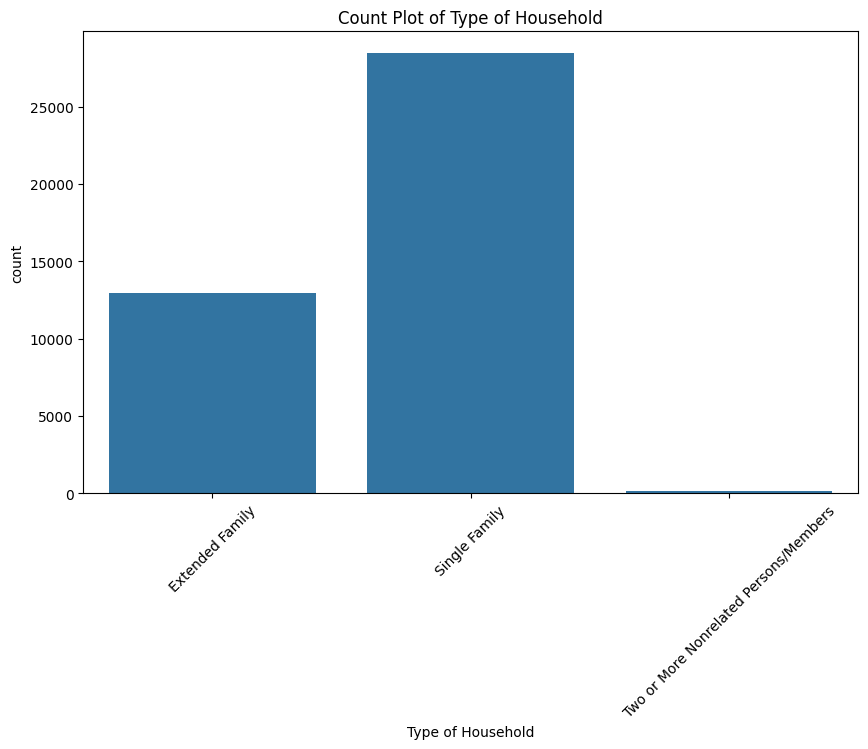

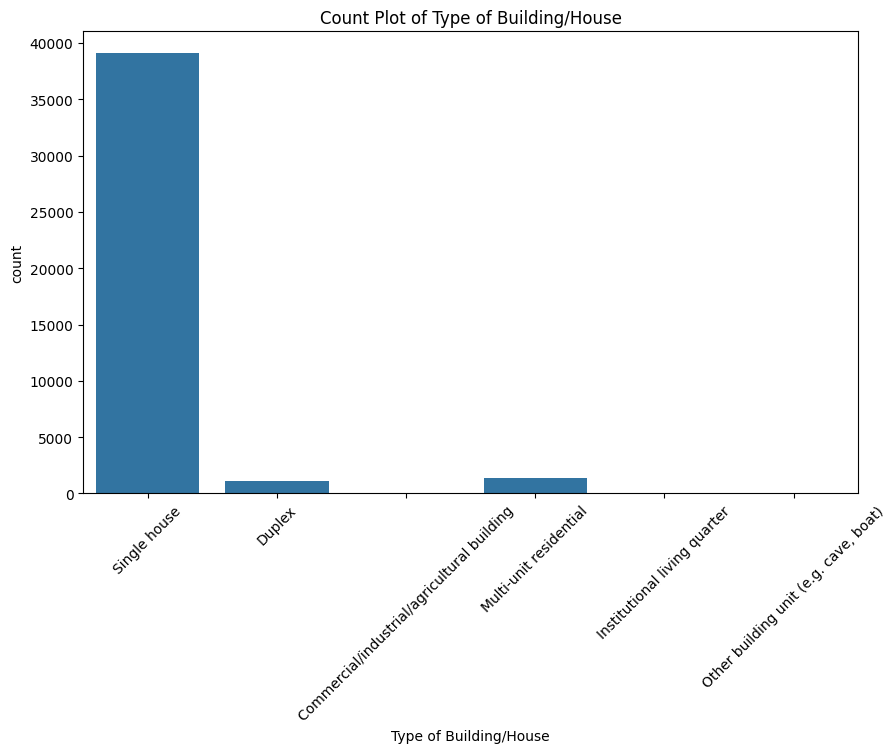

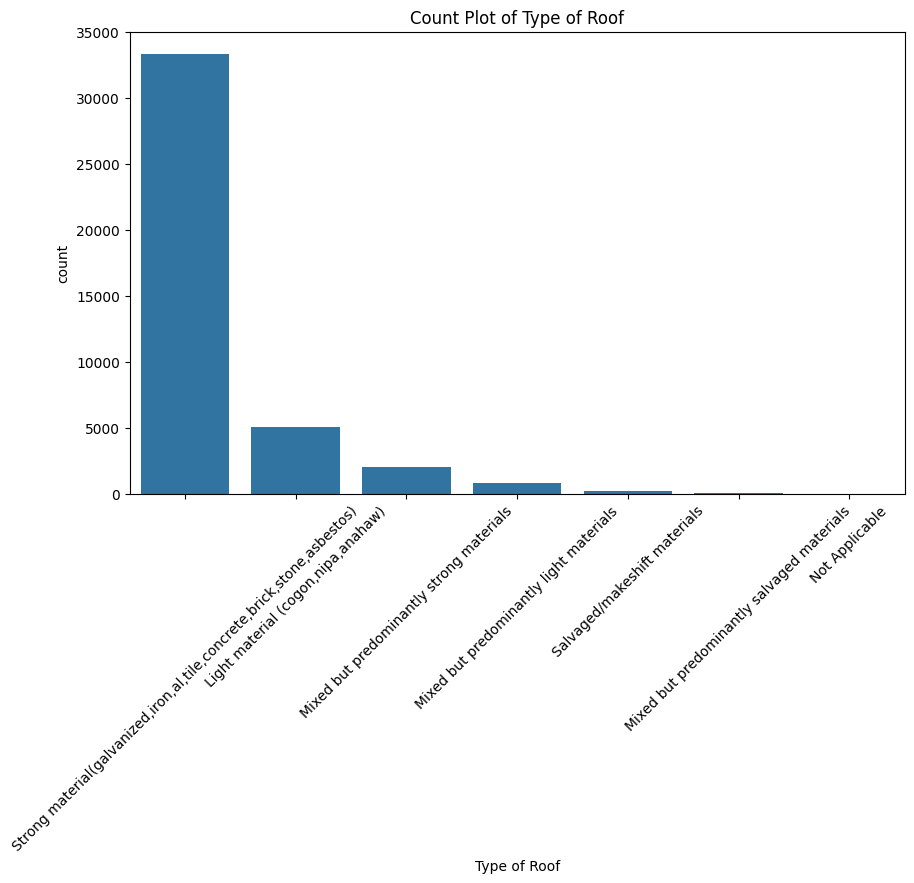

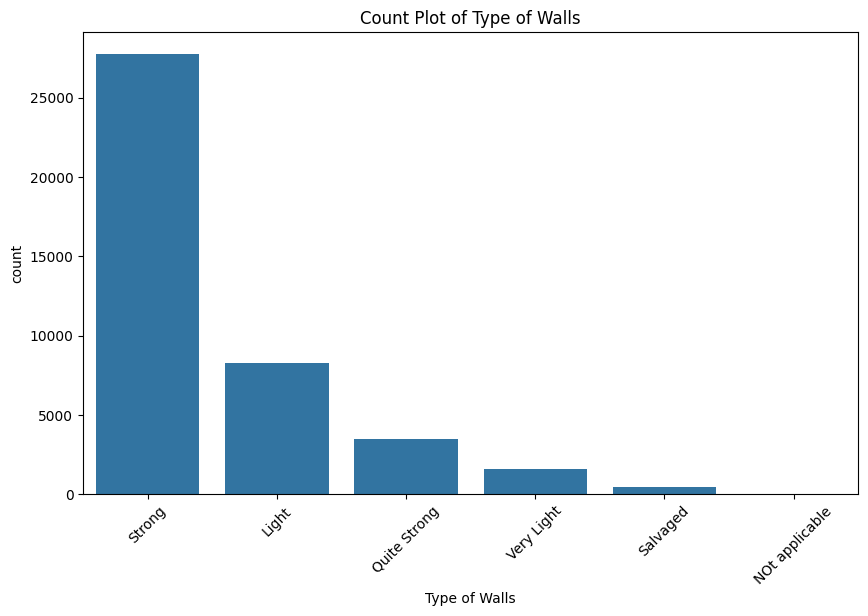

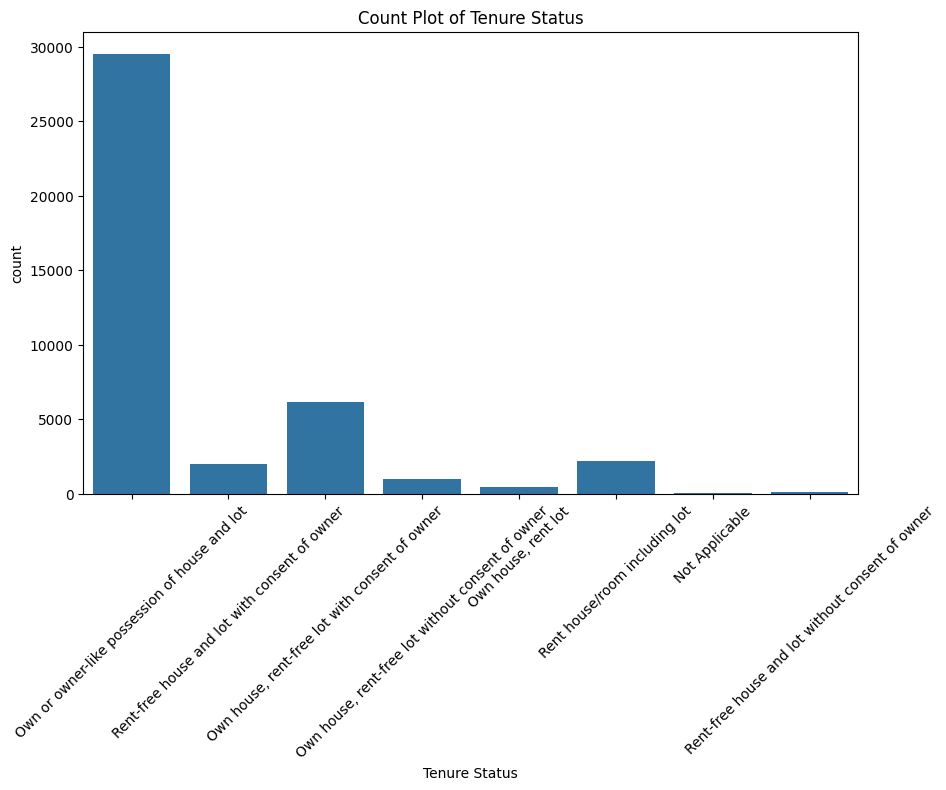

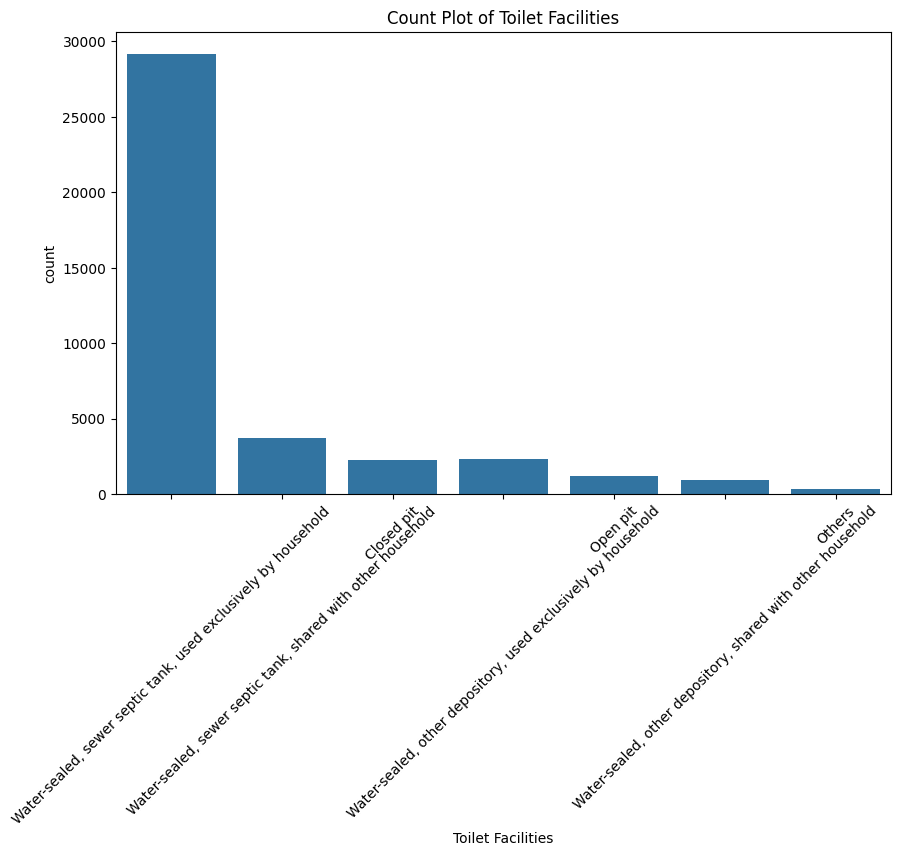

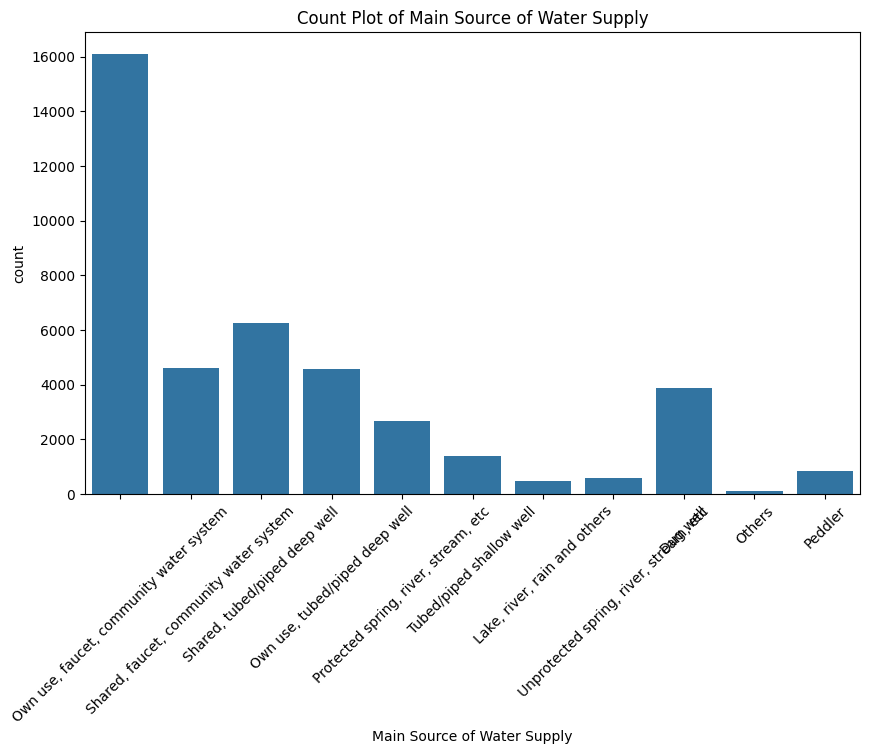

In [30]:
# Plot categorical columns. Tilt x values
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')

In [26]:
# Unique Values of Null Columns : Household Head Occupation, Household Head Class of Worker, Toilet Facilities
null_columns = df.columns[df.isna().any()]
null_columns

Index(['Household Head Occupation', 'Household Head Class of Worker',
       'Toilet Facilities'],
      dtype='object')

In [27]:
# Print unique values for each null column
for column in null_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Household Head Occupation: ['General elementary education teaching professionals'
 'Transport conductors' 'Farmhands and laborers' 'Rice farmers'
 'General managers/managing proprietors in transportation, storage and communications'
 'Heavy truck and lorry drivers' nan 'Hog raising farmers'
 'Vegetable farmers'
 'General managers/managing proprietors in wholesale and retail trade'
 'Stocks clerks' 'Justices' 'Other social science professionals'
 'Protective services workers n. e. c.' 'Secretaries'
 'Electronics mechanics and servicers' 'Foresters and related scientists'
 'Shop salespersons and demonstrators'
 'College, university and higher education teaching professionals'
 'General managers/managing proprietors of restaurants and hotels'
 'Welders and flamecutters' 'Car, taxi and van drivers'
 'Motor vehicle mechanics and related trades workers'
 'Traditional chiefs and heads of villages' 'Motorcycle drivers'
 'Statistical, mathematical and related associate profess

In [31]:
df['Household Head Highest Grade Completed'].value_counts()

,count
Household Head Highest Grade Completed,
High School Graduate,9628
Elementary Graduate,7640
Grade 4,2282
Grade 5,2123
Second Year High School,2104
Grade 3,1994
Third Year High School,1545
Business and Administration Programs,1344
Second Year College,1343


In [32]:
df['Household Head Class of Worker'].value_counts()

,count
Household Head Class of Worker,
Self-employed wihout any employee,13766
Worked for private establishment,13731
Worked for government/government corporation,2820
Employer in own family-operated farm or business,2581
Worked for private household,811
Worked without pay in own family-operated farm or business,285
Worked with pay in own family-operated farm or business,14


In [28]:
# Print Columns of Data Frame
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [33]:
# Regions of Rows with Null Columns
df[df['Household Head Occupation'].isna()]['Region'].value_counts() # 7536 Null Values

,count
Region,
NCR,1021
IVA - CALABARZON,924
III - Central Luzon,804
I - Ilocos Region,553
VI - Western Visayas,548
VII - Central Visayas,449
V - Bicol Region,411
VIII - Eastern Visayas,370
XI - Davao Region,366


In [34]:
df[df['Household Head Class of Worker'].isna()]['Region'].value_counts() #7536 Null Values

,count
Region,
NCR,1021
IVA - CALABARZON,924
III - Central Luzon,804
I - Ilocos Region,553
VI - Western Visayas,548
VII - Central Visayas,449
V - Bicol Region,411
VIII - Eastern Visayas,370
XI - Davao Region,366


In [39]:
# Regions of Rows with Null 'Household Head Occupation' and 'Household Head Class of Worker'
df[(df['Household Head Occupation'].isna()) & (df['Household Head Class of Worker'].isna())]['Region'].value_counts() # 1580 Null Values

,count
Region,
NCR,1021
IVA - CALABARZON,924
III - Central Luzon,804
I - Ilocos Region,553
VI - Western Visayas,548
VII - Central Visayas,449
V - Bicol Region,411
VIII - Eastern Visayas,370
XI - Davao Region,366


In [35]:
df[df['Toilet Facilities'].isna()]['Region'].value_counts() # 1580 Null Values

,count
Region,
V - Bicol Region,277
VI - Western Visayas,224
VIII - Eastern Visayas,210
VII - Central Visayas,193
ARMM,144
IVA - CALABARZON,112
XII - SOCCSKSARGEN,86
IVB - MIMAROPA,76
Caraga,74


# Feature Engineering